In [1]:
# Initial imports
import pandas as pd
from pathlib import Path
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


## Loading and Preprocessing Loans Encoded Data


In [4]:
# Loading data
file_path = Path("Resources/diabetes_binary_5050split_health_indicators_BRFSS2015.csv")
df_diabetes = pd.read_csv(file_path)

# Review the DataFrame
df_diabetes.head()


,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


Define the features set, by copying the `df_lending` DataFrame and dropping the `loan_status` column.

In [6]:
# Define features set
X = df_diabetes.copy()
X.drop("Diabetes_binary", axis=1, inplace=True)
X.head()


,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


Create the target vector by assigning the values of the `loan_status` column from the `df_lending` DataFrame.

In [9]:
# Define target vector
y = df_diabetes["Diabetes_binary"].values.reshape(-1, 1)
y[:5]


array([[0.],
       [0.],
       [0.],
       [0.],
       [0.]])

Split the data into training and testing sets.

In [11]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

Use the `StandardScaler` to scale the features data, remember that only `X_train` and `X_testing` DataFrames should be scaled.

In [14]:
# Create the StandardScaler instance
scaler = StandardScaler()

In [16]:
# Fit the Standard Scaler with the training data
X_scaler = scaler.fit(X_train)

In [18]:
# Scale the training data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Fitting the Random Forest Model

Once the data is scaled, create a random forest instance and train it with the training data (`X_train_scaled` and `y_train`), define `n_estimators=500` and `random_state=78`.

In [21]:
# Create the random forest classifier instance
rf_model = RandomForestClassifier(n_estimators=500, random_state=78)

In [23]:
# Fit the model and use .ravel()on the "y_train" data. 
rf_model = rf_model.fit(X_train_scaled, y_train.ravel())

## Making Predictions Using the Random Forest Model

Validate the trained model by predicting loan defaults using the testing data (`X_test_scaled`).

In [25]:
# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)

## Model Evaluation

Evaluate model's results, by using `sklearn` to calculate the confusion matrix, the accuracy score and to generate the classification report.

In [27]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [28]:
# Displaying results
print("Confusion Matrix")
display(cm_df)

print(f"Accuracy Score : {acc_score}")

print("------------------------------------------------------")

print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,6132,2703
Actual 1,1935,6903


Accuracy Score : 0.7375657783058903
------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.76      0.69      0.73      8835
         1.0       0.72      0.78      0.75      8838

    accuracy                           0.74     17673
   macro avg       0.74      0.74      0.74     17673
weighted avg       0.74      0.74      0.74     17673



Feature importance

In [33]:
 # Random Forests in sklearn will automatically calculate feature importance
importances = rf_model.feature_importances_
# We can sort the features by their importance
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.17016614603325242, 'BMI'),
 (0.12585930932476258, 'Age'),
 (0.11021540899193581, 'GenHlth'),
 (0.0830435167286249, 'Income'),
 (0.07464462019216297, 'HighBP'),
 (0.06810181509913232, 'PhysHlth'),
 (0.056847450063427424, 'Education'),
 (0.05174905776835716, 'MentHlth'),
 (0.040388542581329685, 'HighChol'),
 (0.028342742123592904, 'Smoker'),
 (0.028226206479178863, 'Fruits'),
 (0.026733474036790206, 'Sex'),
 (0.025917242266527443, 'DiffWalk'),
 (0.023171990286804407, 'PhysActivity'),
 (0.021728945418456217, 'Veggies'),
 (0.019624027890576507, 'HeartDiseaseorAttack'),
 (0.012152518631073852, 'NoDocbcCost'),
 (0.010052282816617426, 'Stroke'),
 (0.009376883187391832, 'HvyAlcoholConsump'),
 (0.007497556461457094, 'AnyHealthcare'),
 (0.006160263618548057, 'CholCheck')]

<Axes: title={'center': 'Features Importances'}, ylabel='1'>

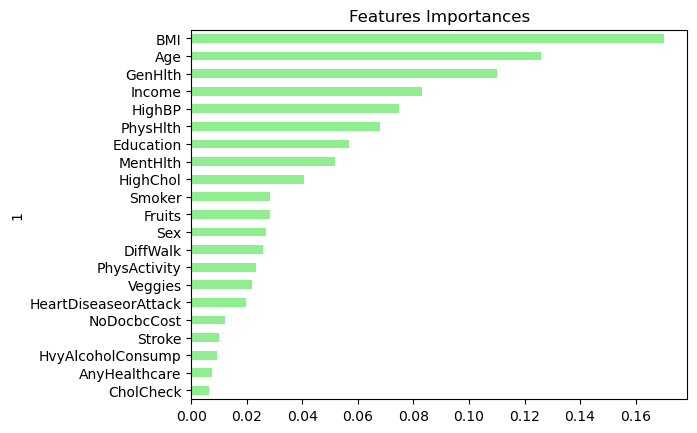

In [35]:
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False)